In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

## Load dataset

In [206]:
#df = pd.read_csv("dataset/V2_PlatteRiverWeir_features_merged_all.csv")
df = pd.read_csv("dataset/Seresnet_101_V1_PlatteRiverWeir_features_merged_all.csv")
df.head()

Unnamed: 0.1  Unnamed: 0           SensorTime          CaptureTime  \
0             0           0  2012-06-09 13:15:00  2012-06-09T13:09:07   
1             1           1  2012-06-09 13:15:00  2012-06-09T13:10:29   
2             2           2  2012-06-09 13:45:00  2012-06-09T13:44:01   
3             3           3  2012-06-09 14:45:00  2012-06-09T14:44:30   
4             4           4  2012-06-09 15:45:00  2012-06-09T15:44:59   

                                 Filename Agency  SiteNumber TimeZone  Stage  \
0  StateLineWeir_20120609_Farrell_001.jpg   USGS     6674500      MDT   2.99   
1  StateLineWeir_20120609_Farrell_002.jpg   USGS     6674500      MDT   2.99   
2  StateLineWeir_20120609_Farrell_003.jpg   USGS     6674500      MDT   2.96   
3  StateLineWeir_20120609_Farrell_004.jpg   USGS     6674500      MDT   2.94   
4  StateLineWeir_20120609_Farrell_005.jpg   USGS     6674500      MDT   2.94   

   Discharge  ... WwRawLineMax  WwRawLineMean  WwRawLineSigma  WwCurveLineMin  \
0      916.0  ...          0.0            0.0             0.0             0.0   
1      916.0  ...          0.0            0.0             0.0             0.0   
2      873.0  ...          0.0            0.0             0.0             0.0   
3      846.0  ...          0.0            0.0             0.0             0.0   
4      846.0  ...          0.0            0.0             0.0             0.0   

   WwCurveLineMax  WwCurveLineMean  WwCurveLineSigma  RiverArea  RiverWidth  \
0             0.0              0.0               0.0    48600.0  204.684959   
1             0.0              0.0               0.0    48672.0  205.898452   
2             0.0              0.0               0.0    48789.0  206.525571   
3             0.0              0.0               0.0    49458.0  209.652156   
4             0.0              0.0               0.0    49719.0  210.088266   

                            FilenameLower  
0  statelineweir_20120609_farrell_001.jpg  
1  statelineweir_20120609_farrell_002.jpg  
2  statelineweir_20120609_farrell_003.jpg  
3  statelineweir_20120609_farrell_004.jpg  
4  statelineweir_20120609_farrell_005.jpg  

[5 rows x 64 columns]

In [207]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['CaptureTime'] = pd.to_datetime(df['CaptureTime'])

In [208]:
df = df.sort_values(by="CaptureTime", ascending=True)

In [209]:
df["Month"] = df['CaptureTime'].dt.month

### Get area, time and the values we want to predict

In [210]:
df_m = df[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth"]]
df_m

Stage  Discharge  Month  RiverArea  RiverWidth
0       2.99      916.0      6    48600.0  204.684959
1       2.99      916.0      6    48672.0  205.898452
2       2.96      873.0      6    48789.0  206.525571
3       2.94      846.0      6    49458.0  209.652156
4       2.94      846.0      6    49719.0  210.088266
...      ...        ...    ...        ...         ...
42054   2.54      434.0     10    41501.0  166.685071
42055   2.54      434.0     10    41591.0  171.758237
42056   2.54      434.0     10    41949.0  176.424371
42057   2.54      434.0     10    42822.0  172.268391
42058   2.54      434.0     10    43076.0  175.271876

[42059 rows x 5 columns]

In [211]:
df_m.describe()

Stage     Discharge         Month     RiverArea    RiverWidth
count  42059.000000  42059.000000  42059.000000  42059.000000  42059.000000
mean       2.878743    970.956439      6.590432  39648.649160    165.860164
std        0.805533   1192.272290      3.143760   7042.836984     23.897312
min        0.000000      0.000000      1.000000      0.000000      0.000000
25%        2.280000    213.000000      4.000000  37475.500000    158.117353
50%        2.550000    388.000000      7.000000  40268.000000    169.245229
75%        3.290000   1350.000000      9.000000  43177.500000    177.911088
max        6.490000   7920.000000     12.000000  69046.000000    290.585493

## Study dataset

### Study all

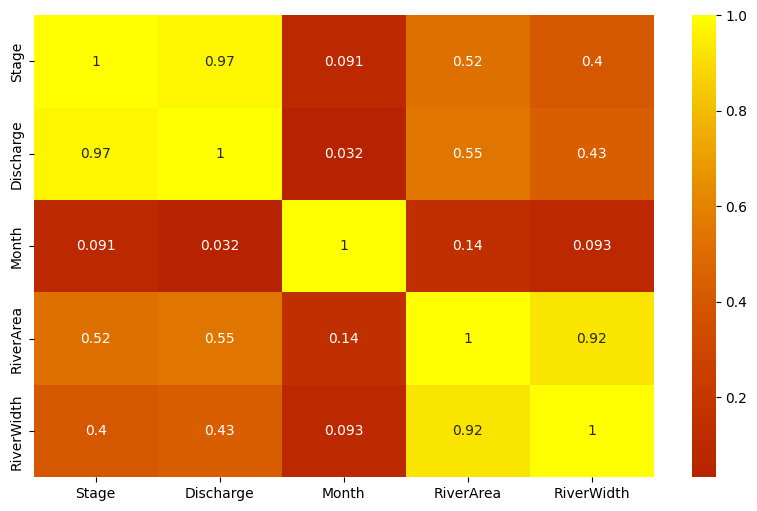

In [212]:
corr_pearson = df_m.corr() # pearson correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, center=0, cmap='gnuplot')
plt.show()

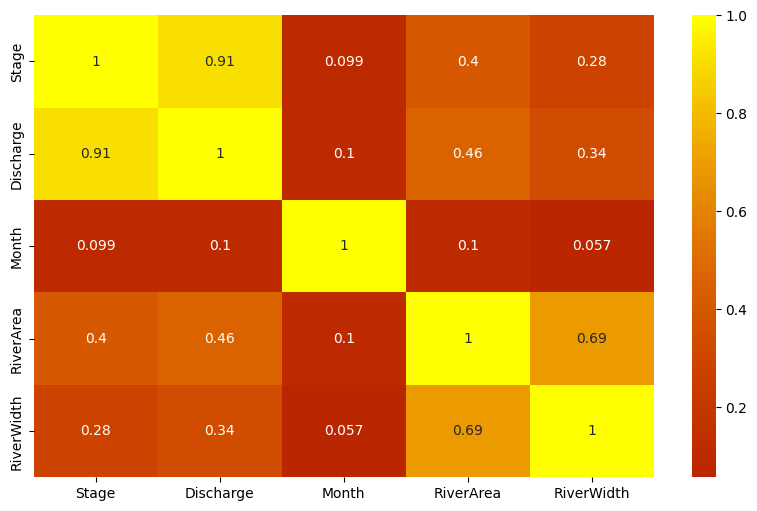

In [213]:
corr_ken = df_m.corr(method="kendall") # kendall correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_ken, annot=True, center=0, cmap='gnuplot')
plt.show()

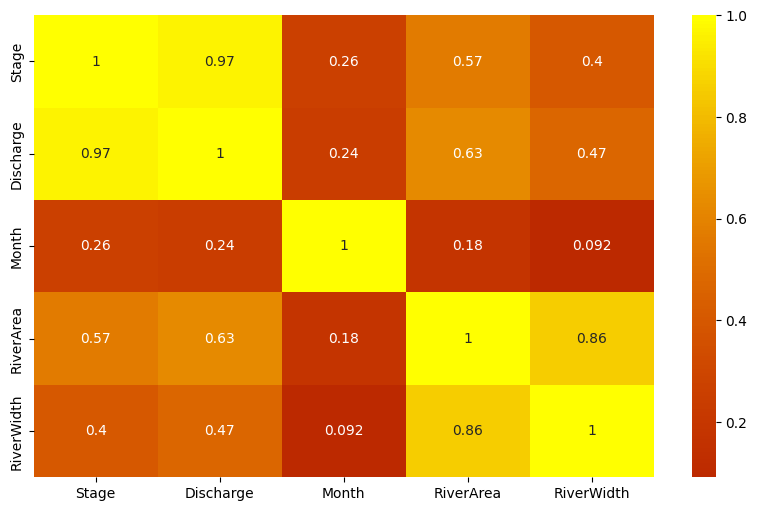

In [214]:
corr_spearman = df_m.corr(method="spearman") # spearman correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman, annot=True, center=0, cmap='gnuplot')
plt.show()

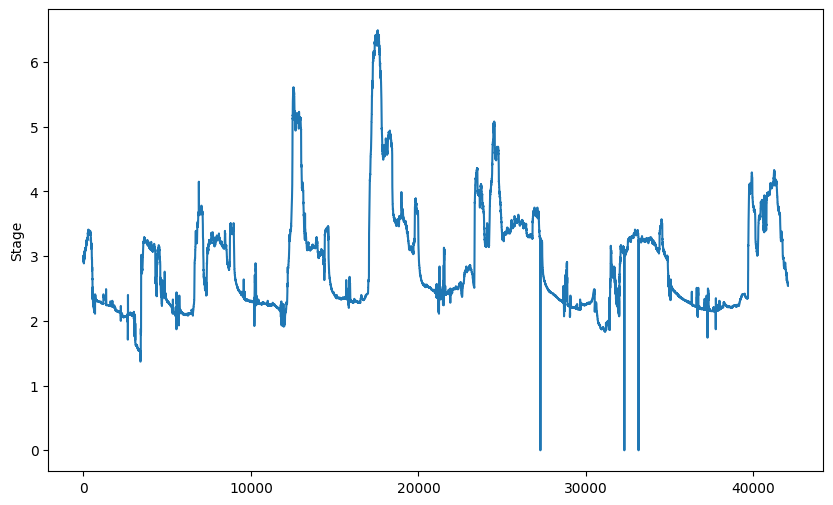

In [215]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_m, x=np.arange(df_m.shape[0]), y="Stage")

plt.show()

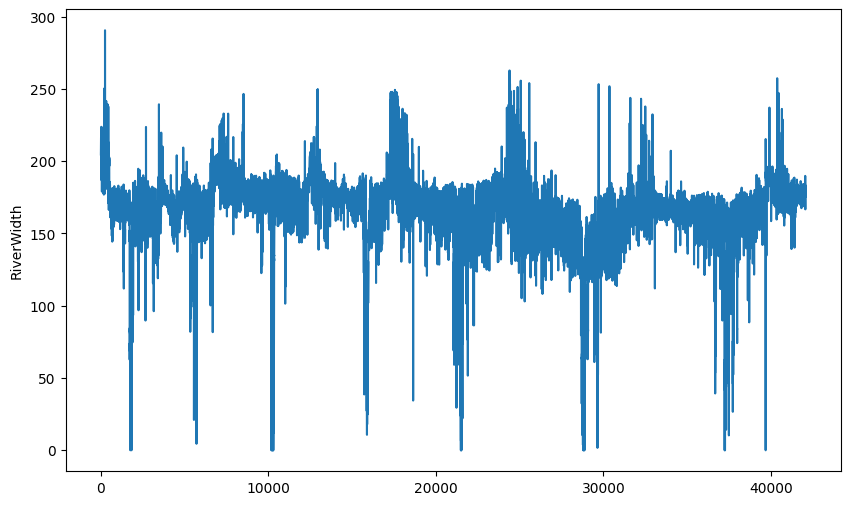

In [216]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_m, x=np.arange(df_m.shape[0]), y="RiverWidth")

plt.show()

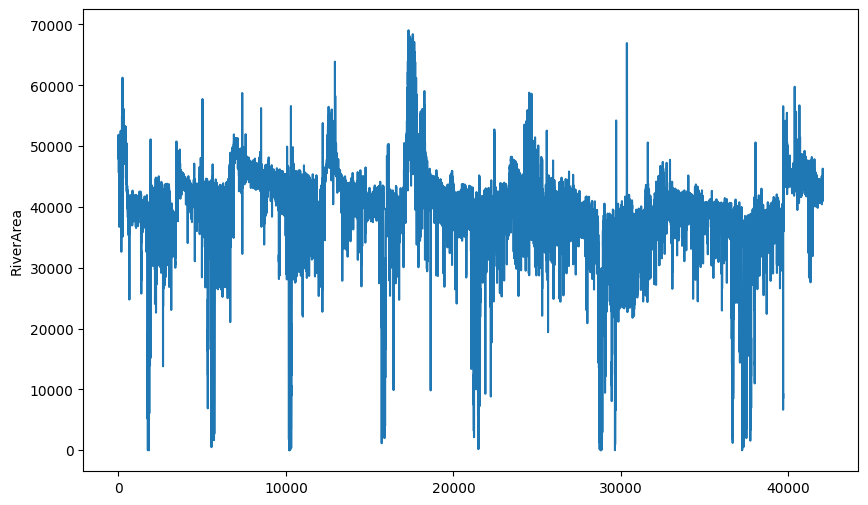

In [217]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_m, x=np.arange(df_m.shape[0]), y="RiverArea")

plt.show()

#### Check outliers

In [218]:
#df_outliers = df[df.RiverArea < 30000]
df_outliers = df[df.RiverWidth < 150]
df_outliers = df_outliers[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth", "Filename"]]
df_outliers.head()

Stage  Discharge  Month  RiverArea  RiverWidth  \
651   2.13      155.0     10    35288.0  148.445433   
655   2.14      159.0     10    36769.0  149.959786   
668   2.14      159.0     10    35618.0  145.897171   
670   2.13      155.0     10    37745.0  149.052158   
671   2.14      159.0     10    36540.0  144.595110   

                                   Filename  
651  StateLineWeir_20121022_Farrell_937.JPG  
655  StateLineWeir_20121023_Farrell_941.JPG  
668  StateLineWeir_20121026_Farrell_977.JPG  
670  StateLineWeir_20121026_Farrell_979.JPG  
671  StateLineWeir_20121026_Farrell_980.JPG

In [219]:
df_outliers.shape

(6332, 6)

In [220]:
path_images = "./dataset/images/"
path_masks = "./dataset/dataset_seg_masks_seresnet_101_1/"

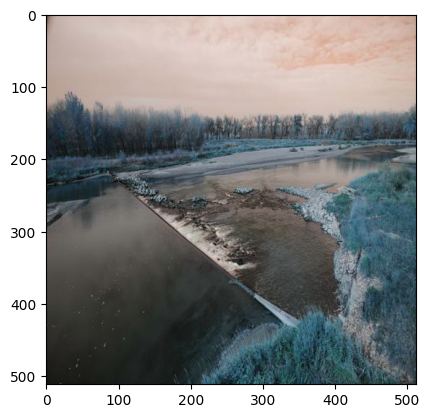

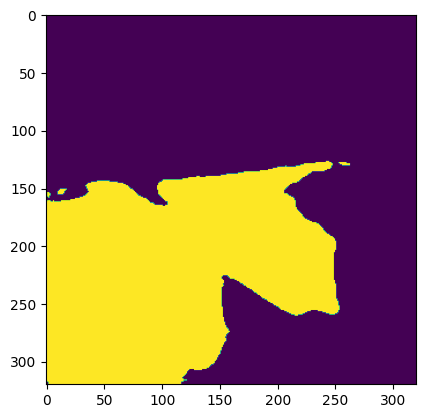

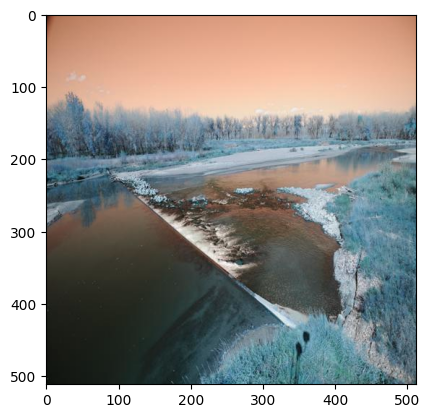

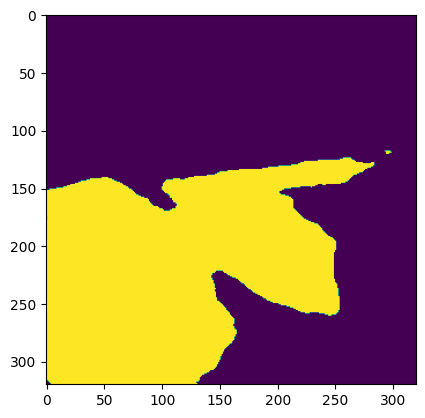

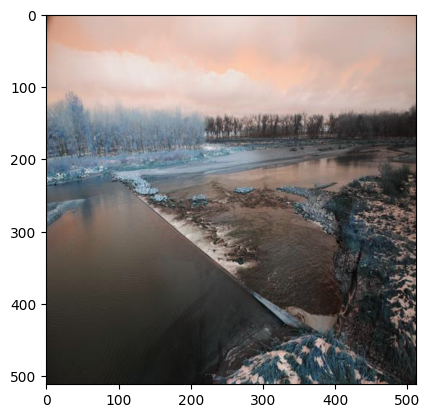

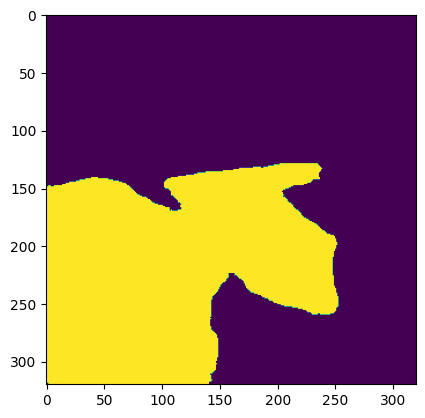

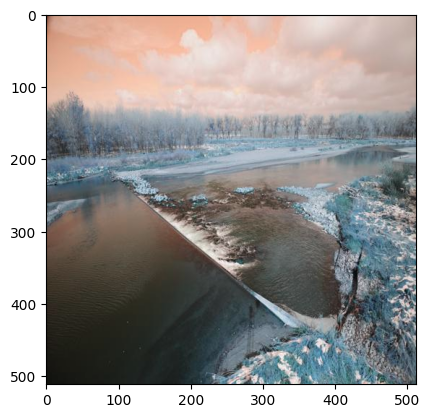

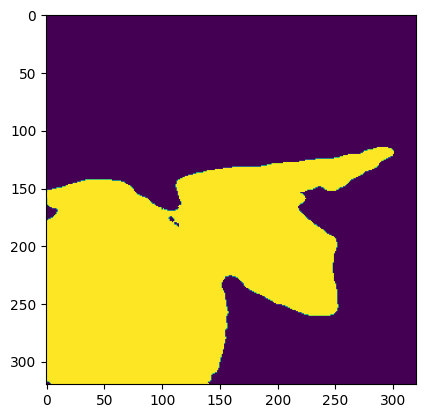

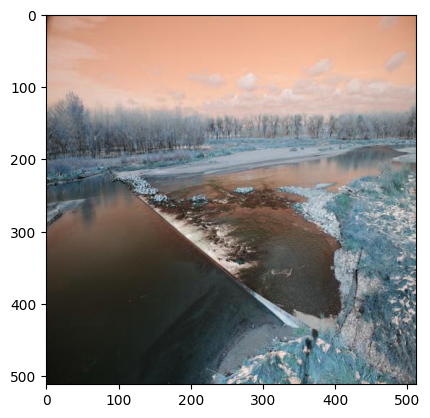

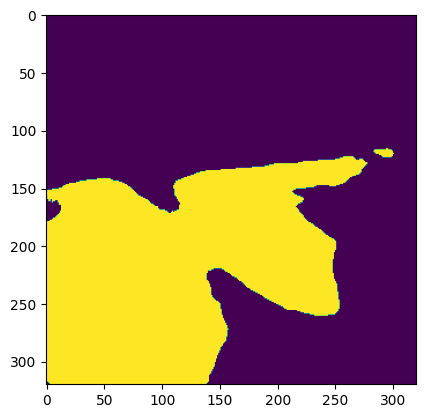

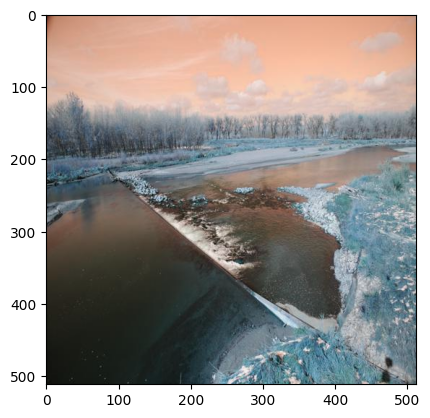

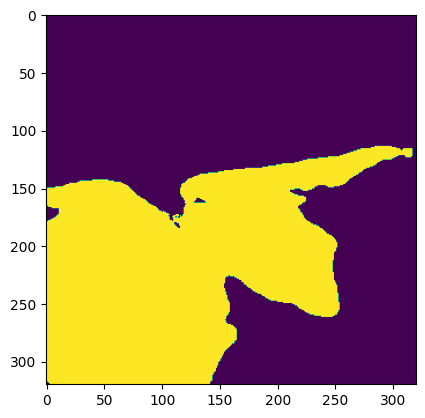

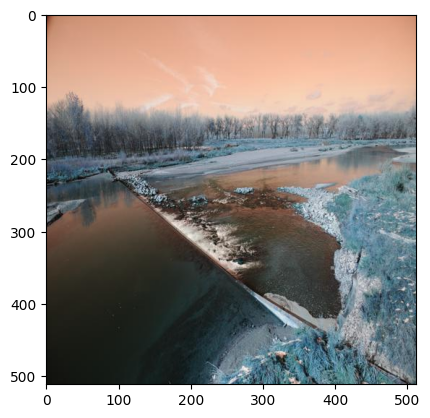

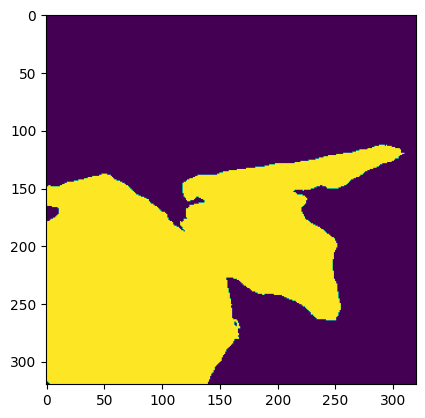

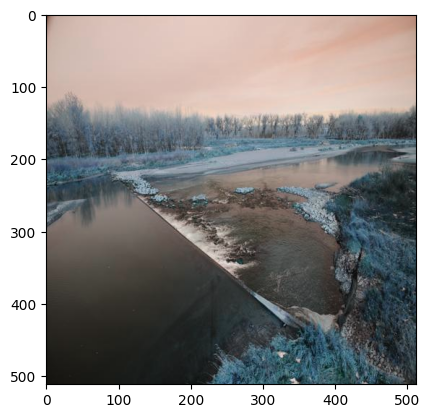

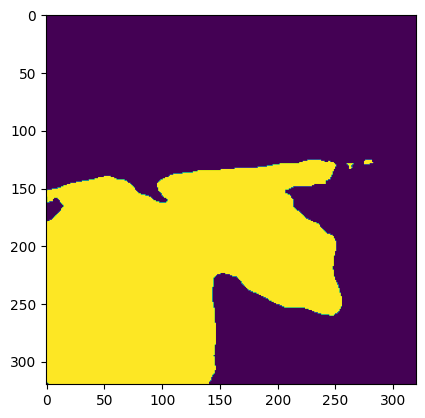

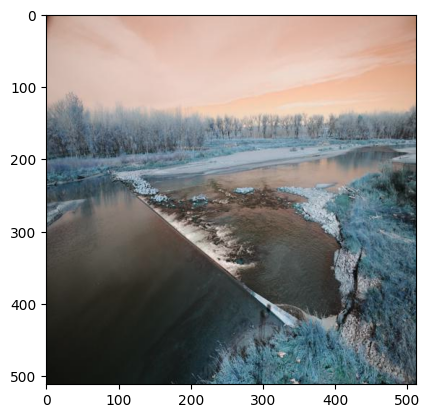

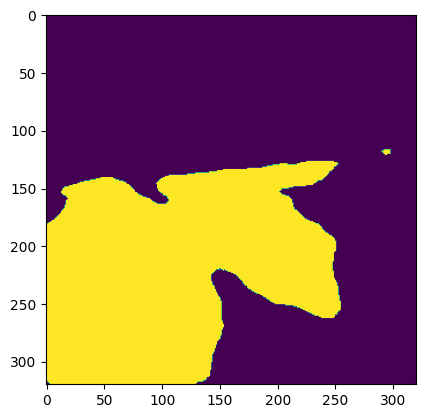

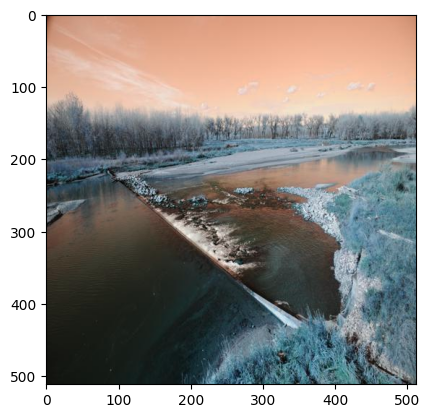

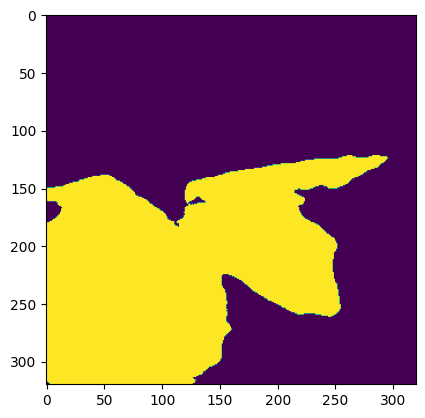

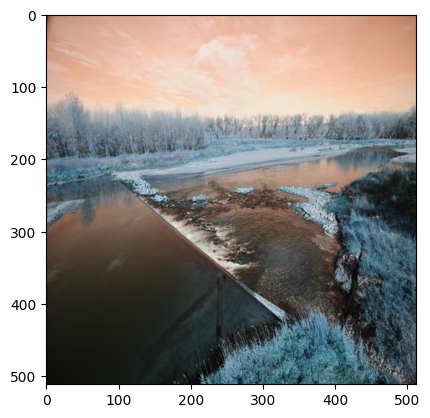

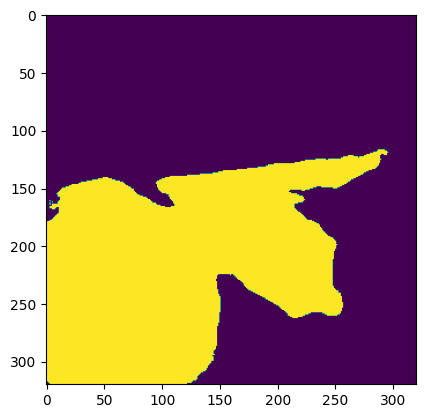

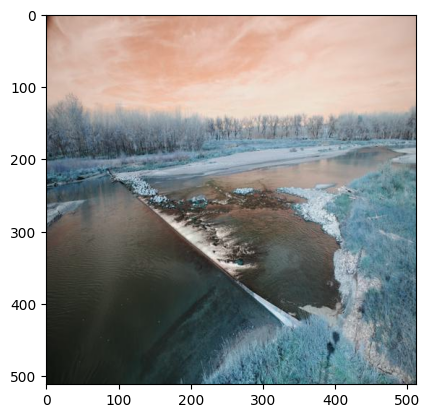

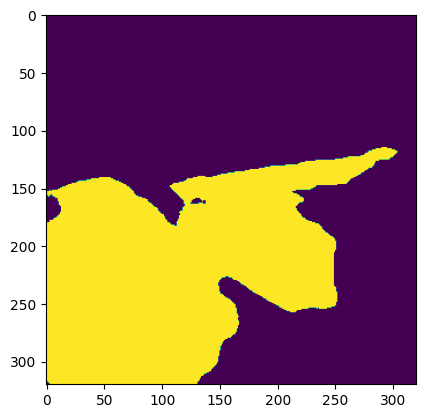

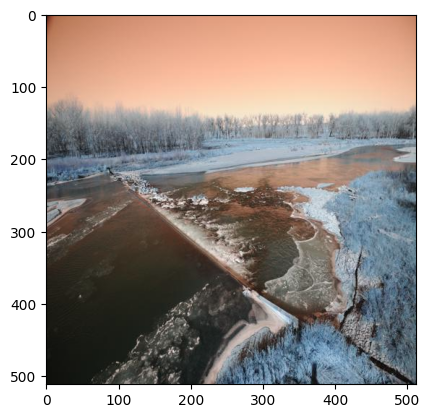

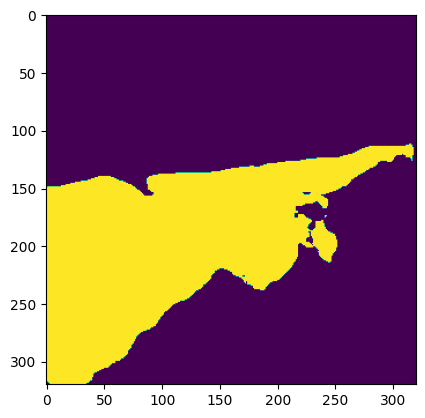

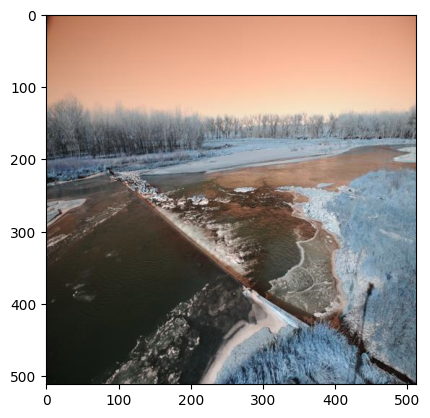

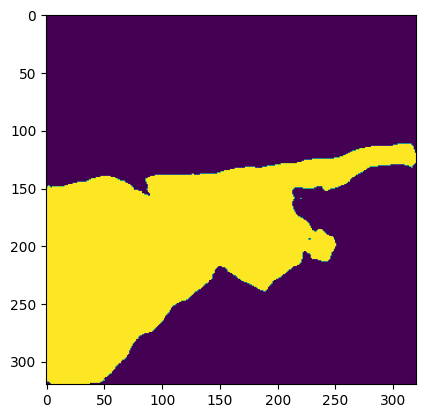

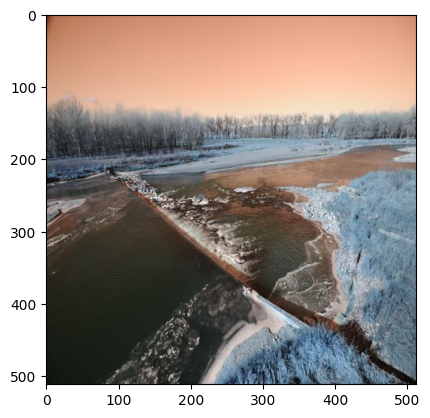

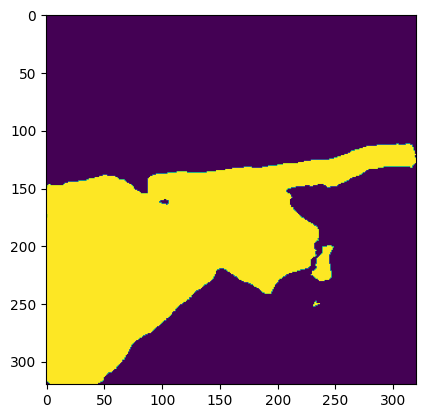

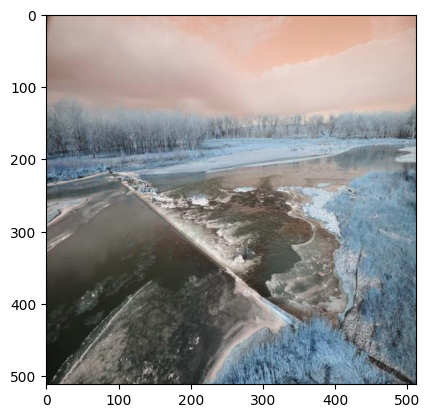

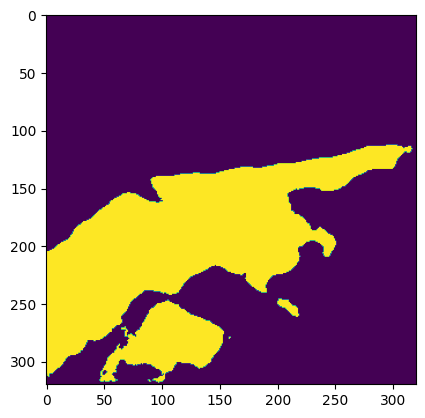

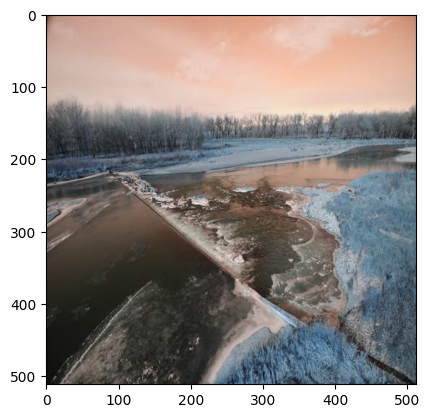

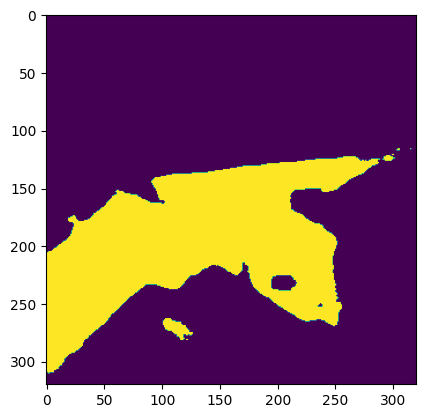

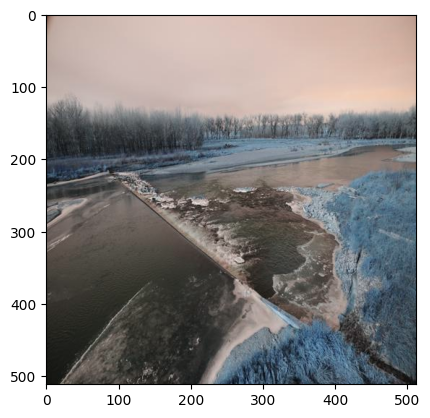

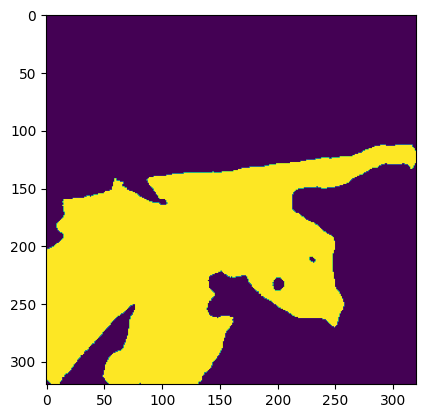

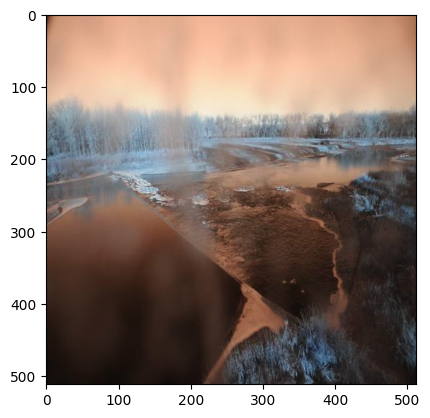

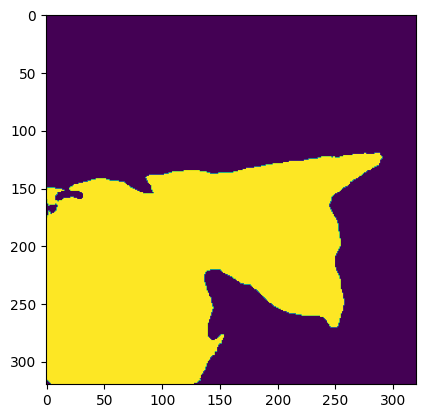

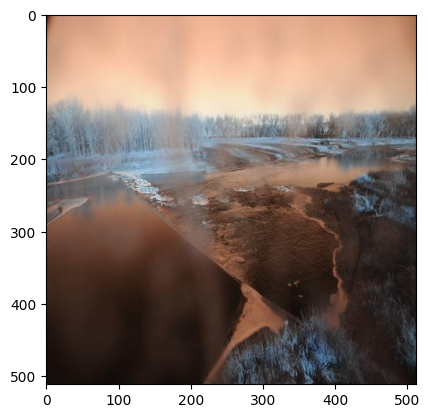

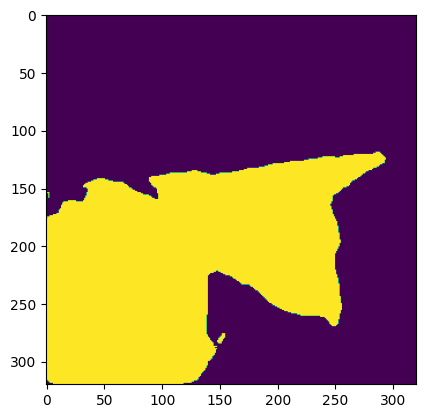

In [221]:
for index, row in df_outliers.head(20).iterrows():
    img = cv2.imread(os.path.join(path_images, row["Filename"]), cv2.COLOR_BGR2RGB)
    mask = cv2.imread(os.path.join(path_masks, row["Filename"].split("/")[-1].rsplit('.', 1)[0] + '.png'), cv2.COLOR_BGR2GRAY)
    plt.imshow(img)
    plt.show()
    plt.imshow(mask)
    plt.show()

### Remove photos that were taking with bad illumination based on time

In [222]:
df_time = df[(df.SensorTime.dt.hour >= 8) & (df.SensorTime.dt.hour <= 17)]
df_time = df_time[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth"]]

In [223]:
df_time.shape

(25785, 5)

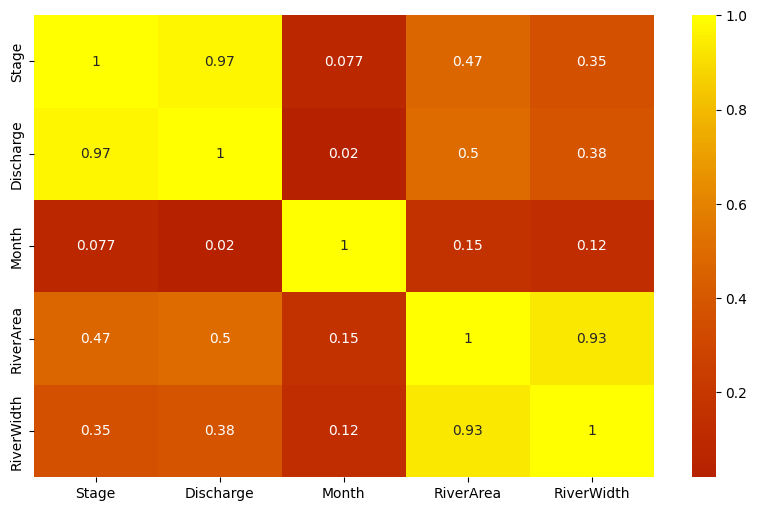

In [224]:
corr_pearson = df_time.corr() # pearson correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, center=0, cmap='gnuplot')
plt.show()

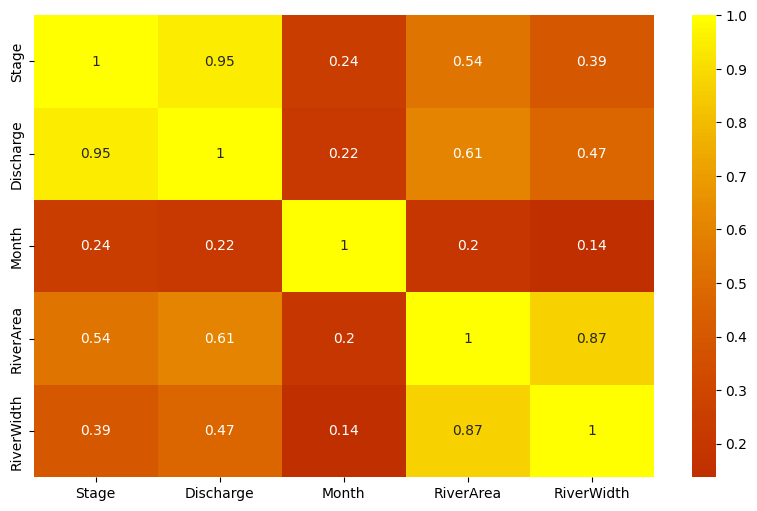

In [225]:
corr_spearman = df_time.corr(method="spearman") # spearman correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman, annot=True, center=0, cmap='gnuplot')
plt.show()

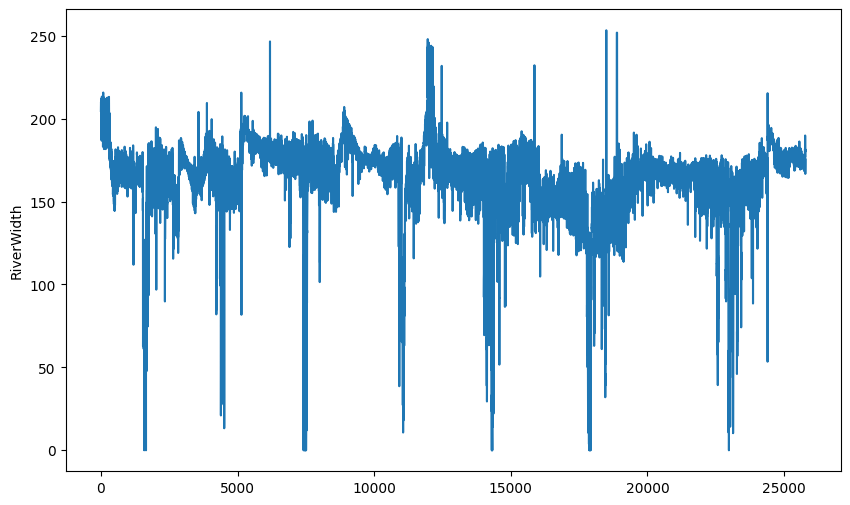

In [226]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_time, x=np.arange(df_time.shape[0]), y="RiverWidth")

plt.show()

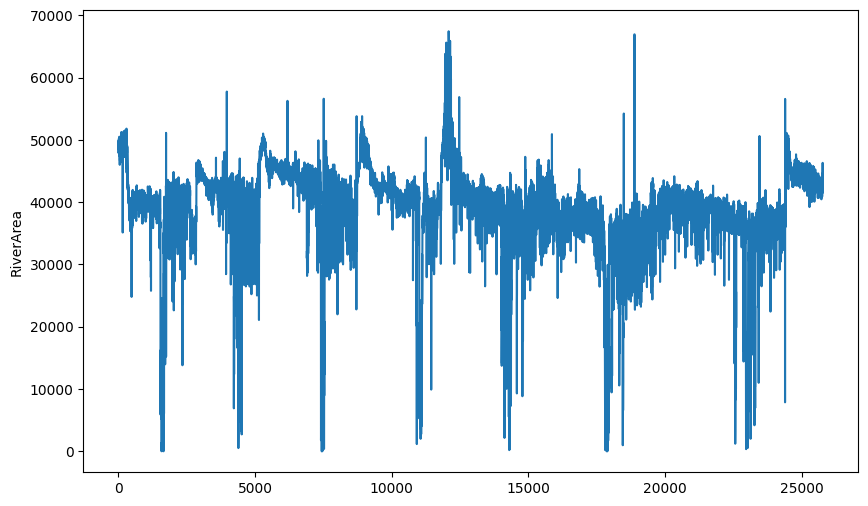

In [227]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_time, x=np.arange(df_time.shape[0]), y="RiverArea")

plt.show()

### Remove winter

In [228]:
df_season = df.copy()
df_season['Year'] = df_season['SensorTime'].dt.year
df_season['Month'] = df_season['SensorTime'].dt.month
df_season['date_offset'] = (df_season.SensorTime.dt.month * 100 + df_season.SensorTime.dt.day - 320) % 1300

df_season['Season'] = pd.cut(df_season['date_offset'], [0, 300, 602, 900, 1300], 
                      labels=['spring', 'summer', 'autumn', 'winter'])

In [229]:
df_season = df_season[df_season['Season'] != "winter"]

In [230]:
df_season = df_season[["Stage", "Discharge", "Month", "RiverArea", "RiverWidth"]]

In [231]:
df_season.shape

(34687, 5)

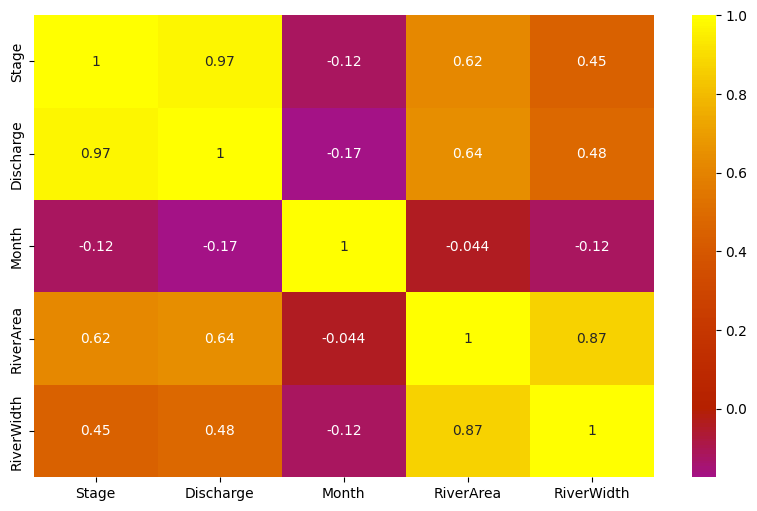

In [232]:
corr_pearson = df_season.corr() # pearson correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_pearson, annot=True, center=0, cmap='gnuplot')
plt.show()

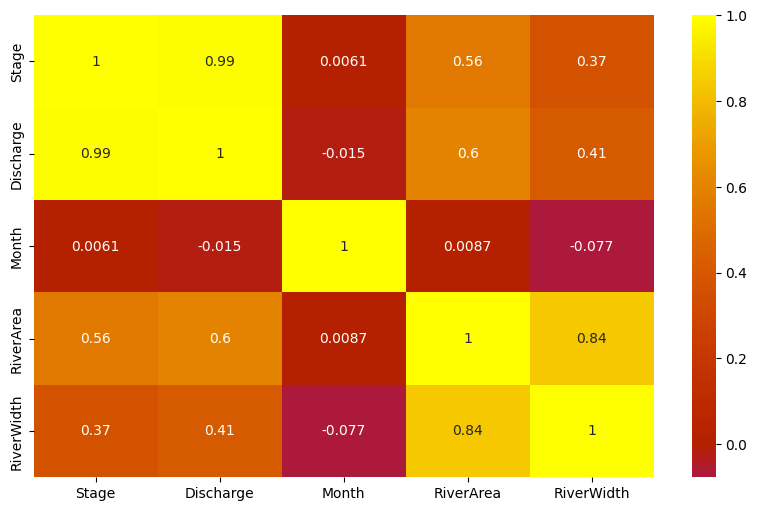

In [233]:
corr_spearman = df_season.corr(method="spearman") # spearman correlation

# generate heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman, annot=True, center=0, cmap='gnuplot')
plt.show()

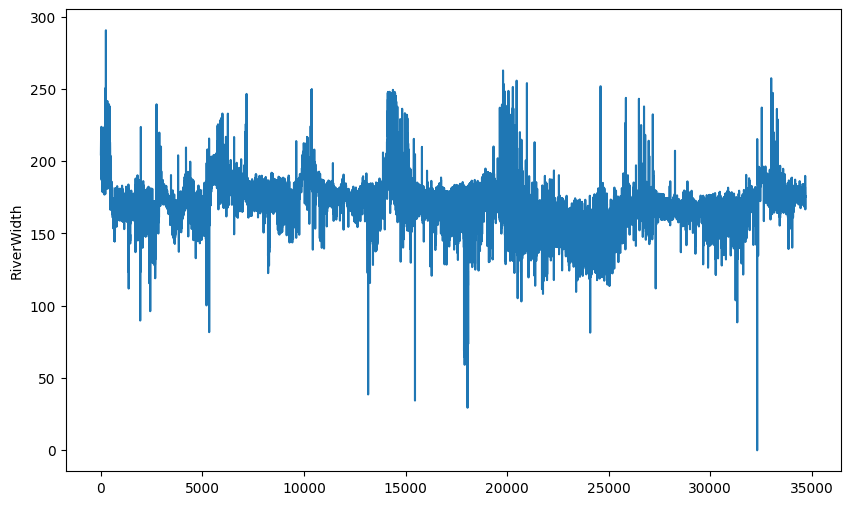

In [234]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_season, x=np.arange(df_season.shape[0]), y="RiverWidth")

plt.show()

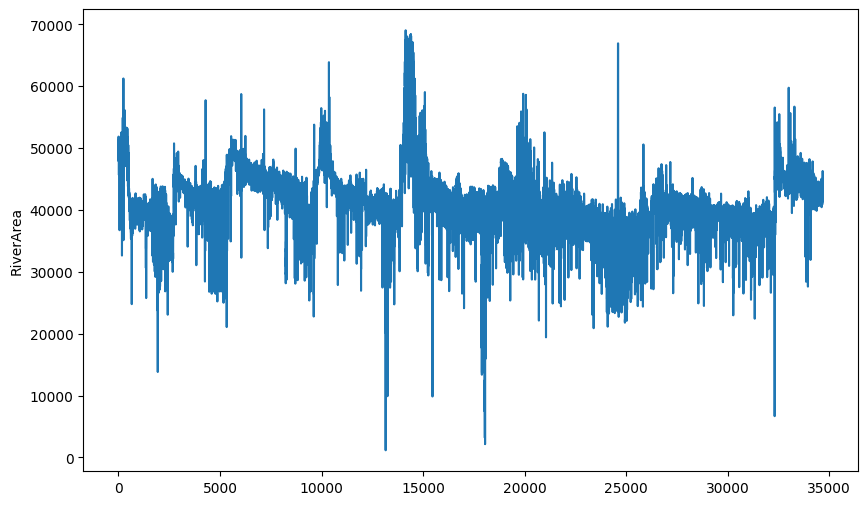

In [235]:
plt.figure(figsize=(10,6))

sns.lineplot(data=df_season, x=np.arange(df_season.shape[0]), y="RiverArea")

plt.show()